In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_train = 'train.csv'
data_train_calendar = 'train_calendar.csv'

data_test = 'test.csv'
data_test_Calendar = 'test_calendar.csv'


In [3]:
#curr_dir = os.path.dirname(os.path.realpath(__file__))
curr_dir = os.getcwd()

data_folder = curr_dir + '/data'
data_folder

'/home/vikram/Downloads/port/ds/projects/order_forecasting/data'

In [4]:

### Load Data
file_path = data_folder + '/' + data_train
print(file_path)
df_train_data = pd.read_csv(file_path)
df_train_data[:5]

/home/vikram/Downloads/port/ds/projects/order_forecasting/data/train.csv


,warehouse,date,orders,holiday_name,holiday,shutdown,mini_shutdown,shops_closed,winter_school_holidays,school_holidays,blackout,mov_change,frankfurt_shutdown,precipitation,snow,user_activity_1,user_activity_2,id
0,Prague_1,2020-12-05,6895.0,NaN,0,0,0,0,0,0,0,0.0,0,0.0,0.0,1722.0,32575.0,Prague_1_2020-12-05
1,Prague_1,2020-12-06,6584.0,NaN,0,0,0,0,0,0,0,0.0,0,0.0,0.0,1688.0,32507.0,Prague_1_2020-12-06
2,Prague_1,2020-12-07,7030.0,NaN,0,0,0,0,0,0,0,0.0,0,0.0,0.0,1696.0,32552.0,Prague_1_2020-12-07
3,Prague_1,2020-12-08,6550.0,NaN,0,0,0,0,0,0,0,0.0,0,0.8,0.0,1681.0,32423.0,Prague_1_2020-12-08
4,Prague_1,2020-12-09,6910.0,NaN,0,0,0,0,0,0,0,0.0,0,0.5,0.0,1704.0,32410.0,Prague_1_2020-12-09


In [5]:
df_train_data.columns

Index(['warehouse', 'date', 'orders', 'holiday_name', 'holiday', 'shutdown',
       'mini_shutdown', 'shops_closed', 'winter_school_holidays',
       'school_holidays', 'blackout', 'mov_change', 'frankfurt_shutdown',
       'precipitation', 'snow', 'user_activity_1', 'user_activity_2', 'id'],
      dtype='object')

In [6]:
df_train_calendar = pd.read_csv(data_folder + '/' + data_train_calendar)
df_train_calendar[:5]

,date,holiday_name,holiday,shutdown,mini_shutdown,warehouse_limited,shops_closed,winter_school_holidays,school_holidays,blackout,mov_change,frankfurt_shutdown,precipitation,snow,warehouse
0,2022-03-09,NaN,0,0,0,0,0,1,0,0,0.0,0,0.0,0.0,Prague_1
1,2019-07-03,NaN,0,0,0,0,0,0,0,0,0.0,0,0.0,0.0,Prague_1
2,2020-05-18,NaN,0,0,0,0,0,0,0,0,0.0,0,0.0,0.0,Prague_1
3,2021-11-09,NaN,0,0,0,0,0,0,0,0,0.0,0,0.0,0.0,Prague_1
4,2023-08-02,NaN,0,0,0,0,0,0,0,0,0.0,0,2.5,0.0,Prague_1


In [7]:
df_train_calendar.columns

Index(['date', 'holiday_name', 'holiday', 'shutdown', 'mini_shutdown',
       'warehouse_limited', 'shops_closed', 'winter_school_holidays',
       'school_holidays', 'blackout', 'mov_change', 'frankfurt_shutdown',
       'precipitation', 'snow', 'warehouse'],
      dtype='object')

In [8]:
### Changing the datatypes
df_train_data.dtypes

warehouse                  object
date                       object
orders                    float64
holiday_name               object
holiday                     int64
shutdown                    int64
mini_shutdown               int64
shops_closed                int64
winter_school_holidays      int64
school_holidays             int64
blackout                    int64
mov_change                float64
frankfurt_shutdown          int64
precipitation             float64
snow                      float64
user_activity_1           float64
user_activity_2           float64
id                         object
dtype: object

In [9]:
df_train_data = df_train_data.astype({'date':'datetime64[ns]', 'holiday_name': str,})
df_train_data[:5]

,warehouse,date,orders,holiday_name,holiday,shutdown,mini_shutdown,shops_closed,winter_school_holidays,school_holidays,blackout,mov_change,frankfurt_shutdown,precipitation,snow,user_activity_1,user_activity_2,id
0,Prague_1,2020-12-05,6895.0,nan,0,0,0,0,0,0,0,0.0,0,0.0,0.0,1722.0,32575.0,Prague_1_2020-12-05
1,Prague_1,2020-12-06,6584.0,nan,0,0,0,0,0,0,0,0.0,0,0.0,0.0,1688.0,32507.0,Prague_1_2020-12-06
2,Prague_1,2020-12-07,7030.0,nan,0,0,0,0,0,0,0,0.0,0,0.0,0.0,1696.0,32552.0,Prague_1_2020-12-07
3,Prague_1,2020-12-08,6550.0,nan,0,0,0,0,0,0,0,0.0,0,0.8,0.0,1681.0,32423.0,Prague_1_2020-12-08
4,Prague_1,2020-12-09,6910.0,nan,0,0,0,0,0,0,0,0.0,0,0.5,0.0,1704.0,32410.0,Prague_1_2020-12-09


In [10]:
# GET Distinct values
for column_name in df_train_data.columns:
    continue
    if column_name not in ['date']:
        print (f'Unique {column_name} Values | \n "{df_train_data[column_name].unique()}"')

In [11]:
for column_name in df_train_calendar:
    pass
    #print(f'Unique {column_name} Values | \n {df_train_calendar[column_name].unique()}')

In [12]:
df_train_data.columns

Index(['warehouse', 'date', 'orders', 'holiday_name', 'holiday', 'shutdown',
       'mini_shutdown', 'shops_closed', 'winter_school_holidays',
       'school_holidays', 'blackout', 'mov_change', 'frankfurt_shutdown',
       'precipitation', 'snow', 'user_activity_1', 'user_activity_2', 'id'],
      dtype='object')

In [13]:
### Adding day of the week
df_train_data['day_of_week'] = df_train_data['date'].dt.day_name()


In [14]:
for column_name in df_train_data:
    print(f'Unique NA for colunn nama {column_name}    |    {df_train_data[column_name].isna().unique()}')


Unique NA for colunn nama warehouse    |    [False]
Unique NA for colunn nama date    |    [False]
Unique NA for colunn nama orders    |    [False]
Unique NA for colunn nama holiday_name    |    [False]
Unique NA for colunn nama holiday    |    [False]
Unique NA for colunn nama shutdown    |    [False]
Unique NA for colunn nama mini_shutdown    |    [False]
Unique NA for colunn nama shops_closed    |    [False]
Unique NA for colunn nama winter_school_holidays    |    [False]
Unique NA for colunn nama school_holidays    |    [False]
Unique NA for colunn nama blackout    |    [False]
Unique NA for colunn nama mov_change    |    [False]
Unique NA for colunn nama frankfurt_shutdown    |    [False]
Unique NA for colunn nama precipitation    |    [False  True]
Unique NA for colunn nama snow    |    [False  True]
Unique NA for colunn nama user_activity_1    |    [False]
Unique NA for colunn nama user_activity_2    |    [False]
Unique NA for colunn nama id    |    [False]
Unique NA for colunn 

In [15]:
# Adding -1 for precipitation and snow

#df_train_data = df_train_data.fillna({'snow':-1, 'precipitation': -1})
df_train_data=df_train_data.dropna()

In [16]:
df = df_train_data[['date','id','warehouse', 'snow', 'precipitation', 'user_activity_1', 'user_activity_2', 'day_of_week', 'orders']].copy()
df

,date,id,warehouse,snow,precipitation,user_activity_1,user_activity_2,day_of_week,orders
0,2020-12-05,Prague_1_2020-12-05,Prague_1,0.0,0.00,1722.0,32575.0,Saturday,6895.0
1,2020-12-06,Prague_1_2020-12-06,Prague_1,0.0,0.00,1688.0,32507.0,Sunday,6584.0
2,2020-12-07,Prague_1_2020-12-07,Prague_1,0.0,0.00,1696.0,32552.0,Monday,7030.0
3,2020-12-08,Prague_1_2020-12-08,Prague_1,0.0,0.80,1681.0,32423.0,Tuesday,6550.0
4,2020-12-09,Prague_1_2020-12-09,Prague_1,0.0,0.50,1704.0,32410.0,Wednesday,6910.0
...,...,...,...,...,...,...,...,...,...
7335,2024-03-10,Budapest_1_2024-03-10,Budapest_1,0.0,1.51,2983.0,27111.0,Sunday,6733.0
7336,2024-03-11,Budapest_1_2024-03-11,Budapest_1,0.0,1.03,2975.0,27133.0,Monday,6492.0
7337,2024-03-12,Budapest_1_2024-03-12,Budapest_1,0.0,0.21,2974.0,27151.0,Tuesday,6661.0
7338,2024-03-13,Budapest_1_2024-03-13,Budapest_1,0.0,0.00,2979.0,27180.0,Wednesday,6843.0


In [17]:
df.agg(['min', 'max'])

,date,id,warehouse,snow,precipitation,user_activity_1,user_activity_2,day_of_week,orders
min,2020-12-05,Brno_1_2020-12-05,Brno_1,0.00,0.0,482.0,1797.0,Friday,790.0
max,2024-03-15,Prague_3_2024-03-15,Prague_3,19.84,80.0,3437.0,45769.0,Wednesday,18139.0


In [18]:
# Encoding the categorical values
df


,date,id,warehouse,snow,precipitation,user_activity_1,user_activity_2,day_of_week,orders
0,2020-12-05,Prague_1_2020-12-05,Prague_1,0.0,0.00,1722.0,32575.0,Saturday,6895.0
1,2020-12-06,Prague_1_2020-12-06,Prague_1,0.0,0.00,1688.0,32507.0,Sunday,6584.0
2,2020-12-07,Prague_1_2020-12-07,Prague_1,0.0,0.00,1696.0,32552.0,Monday,7030.0
3,2020-12-08,Prague_1_2020-12-08,Prague_1,0.0,0.80,1681.0,32423.0,Tuesday,6550.0
4,2020-12-09,Prague_1_2020-12-09,Prague_1,0.0,0.50,1704.0,32410.0,Wednesday,6910.0
...,...,...,...,...,...,...,...,...,...
7335,2024-03-10,Budapest_1_2024-03-10,Budapest_1,0.0,1.51,2983.0,27111.0,Sunday,6733.0
7336,2024-03-11,Budapest_1_2024-03-11,Budapest_1,0.0,1.03,2975.0,27133.0,Monday,6492.0
7337,2024-03-12,Budapest_1_2024-03-12,Budapest_1,0.0,0.21,2974.0,27151.0,Tuesday,6661.0
7338,2024-03-13,Budapest_1_2024-03-13,Budapest_1,0.0,0.00,2979.0,27180.0,Wednesday,6843.0


In [20]:
# Train Test Validation Split
from sklearn.model_selection import train_test_split

y = df['orders']
X = df.drop('orders', axis=1)
y

0       6895.0
1       6584.0
2       7030.0
3       6550.0
4       6910.0
         ...  
7335    6733.0
7336    6492.0
7337    6661.0
7338    6843.0
7339    8130.0
Name: orders, Length: 7070, dtype: float64

In [21]:
X_temp = X.drop(['date', 'id', 'day_of_week', 'warehouse'], axis=1)
#X_temp['order'] = Y

X_temp_centered=X_temp.apply(lambda x: x-x.mean())
X_temp_centered

,snow,precipitation,user_activity_1,user_activity_2
0,-0.290112,-1.621126,63.978076,8872.737482
1,-0.290112,-1.621126,29.978076,8804.737482
2,-0.290112,-1.621126,37.978076,8849.737482
3,-0.290112,-0.821126,22.978076,8720.737482
4,-0.290112,-1.121126,45.978076,8707.737482
...,...,...,...,...
7335,-0.290112,-0.111126,1324.978076,3408.737482
7336,-0.290112,-0.591126,1316.978076,3430.737482
7337,-0.290112,-1.411126,1315.978076,3448.737482
7338,-0.290112,-1.621126,1320.978076,3477.737482


In [22]:
X_temp.mean()

snow                   0.290112
precipitation          1.621126
user_activity_1     1658.021924
user_activity_2    23702.262518
dtype: float64

<Axes: title={'center': 'Feature Correlation Heatmap'}>

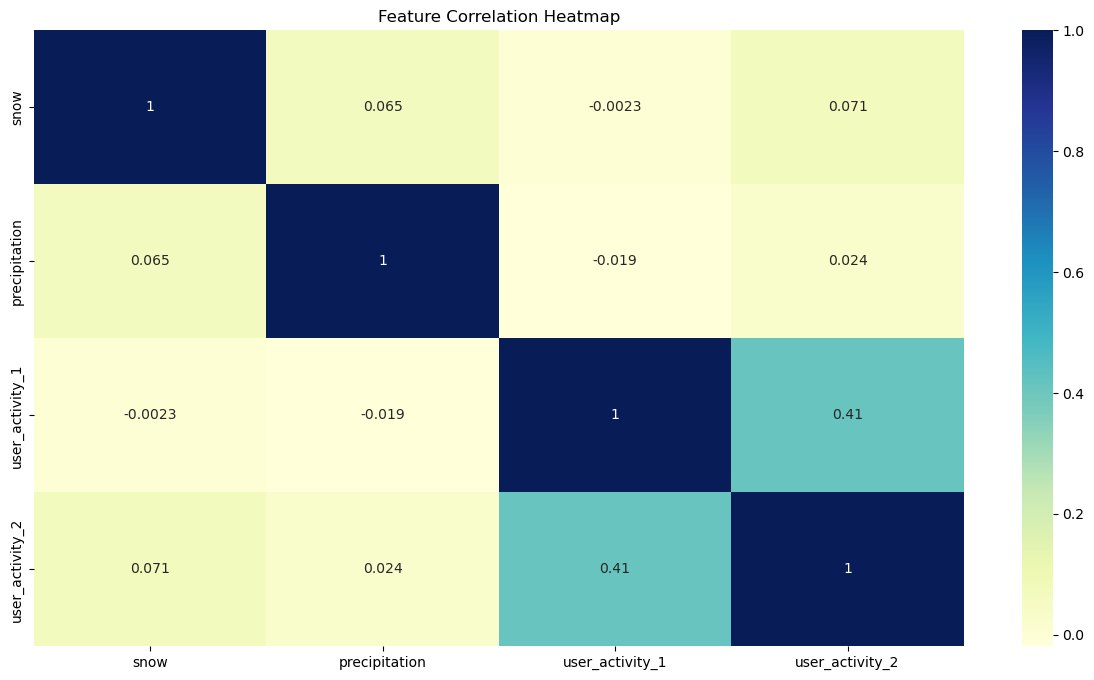

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8))
plt.title('Feature Correlation Heatmap')
sns.heatmap(X_temp_centered.corr(), annot=True, cmap='YlGnBu')# Train Test Validation Split


In [24]:

X_temp_centered

,snow,precipitation,user_activity_1,user_activity_2
0,-0.290112,-1.621126,63.978076,8872.737482
1,-0.290112,-1.621126,29.978076,8804.737482
2,-0.290112,-1.621126,37.978076,8849.737482
3,-0.290112,-0.821126,22.978076,8720.737482
4,-0.290112,-1.121126,45.978076,8707.737482
...,...,...,...,...
7335,-0.290112,-0.111126,1324.978076,3408.737482
7336,-0.290112,-0.591126,1316.978076,3430.737482
7337,-0.290112,-1.411126,1315.978076,3448.737482
7338,-0.290112,-1.621126,1320.978076,3477.737482


In [ ]:
from sklearn.preprocessing import OneHotEncoder

#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
cols = ['warehouse', 'day_of_week']
#cols = ['warehouse']
data_x = pd.concat([X_temp_centered, X[cols]], axis =1)

onehot = encoder.fit_transform(data_x[cols])

one_hot_df = pd.DataFrame(onehot, columns=encoder.get_feature_names_out(cols))


# Concatenate the one-hot encoded dataframe with the original dataframe
X_encoded = pd.concat([data_x.reset_index(drop=True), one_hot_df.reset_index(drop=True)], axis=1)

# Drop the original categorical columns
X_encoded = X_encoded.drop(cols, axis=1)

print(f'data_X | {data_x.shape}')
print(f'one_hot_df | {one_hot_df.shape}')
print(f'X_encoded | {X_encoded.shape}')
# Display the resulting dataframe
#print(f"Encoded Employee data : \n{X_encoded}")

In [ ]:
print(data_x[:1])
print(one_hot_df[:1])

In [ ]:
X_encoded.shape

In [ ]:
t_df = pd.concat([X_temp_centered, y], axis=1)
t_cols=['warehouse', 'day_of_week']
plt.figure(figsize=(15,8))
sns.heatmap(t_df.corr(), annot=True, cmap='YlGnBu')# Train Test Validation Split


In [ ]:



X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.33, random_state=42)

In [ ]:
X_train.columns.size

In [ ]:
### DEFINE A Deep Neural Network for prediction

import torch
import torch.nn as nn

device ="cuda" if torch.cuda.is_available() else "cpu"
device

In [ ]:
class DNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(18, 13)
        self.act1 = nn.ReLU()
        self.hidden2 = nn.Linear(13, 9)
        self.act2 = nn.ReLU()
        
        self.hidden3 = nn.Linear(9, 4)
        self.act3 = nn.ReLU()
        self.output = nn.Linear(4, 1)
        self.act4 = nn.ReLU()
 
    def forward(self, x):
        x = self.act1(self.hidden1(x))
        x = self.act2(self.hidden2(x))
        x = self.act3(self.hidden3(x))
        x = self.act4(self.output(x))
        return x

In [ ]:

print(X_train.isna())
X_train_np = X_train.to_numpy()
Y_train_np = y_train.to_numpy()
X_train_torch = torch.from_numpy(X_train_np).to(device)
Y_train_torch = torch.from_numpy(Y_train_np).to(device)


In [ ]:
X_train_torch=X_train_torch.to(torch.float32)
Y_train_torch=Y_train_torch.to(torch.float32)

In [ ]:
X_train_torch[:32]

In [ ]:
model1 = DNN()
model1.to(device)
model1.parameters

In [ ]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model1.parameters(), lr=0.001)

In [ ]:
n_epochs = 100
batch_size = 100
loss=0
for epoch in range(n_epochs):
    for i in range(0, len(X_train_torch), batch_size):
        Xbatch = X_train_torch[i:i+batch_size]
        y_pred = model1(Xbatch)
        #print(f'Y Pred: | {y_pred}')

        ybatch = Y_train_torch[i:i+batch_size]
        #print(f'Y BATCH | {ybatch}')
        loss = loss_fn(y_pred, ybatch)
        #print(f'LOSS | {loss}')
        optimizer.zero_grad()
        loss.backward()
        #nn.utils.clip_grad_norm_(model1.parameters(), max_norm=2.0, norm_type=2)
        optimizer.step()

    print(f'Finished epoch {epoch}, latest loss {loss}')

In [ ]:
X_encoded.isnull().values.sum()

In [ ]:
X_encoded.describe()